Missing values before handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Missing values after handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Isolation Forest Model Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      2384
         1.0       0.0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 5.4934 - val_loss: 1.2276
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6547 - val_loss: 1.1556
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5778 - val_loss: 1.1120
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5273 - val_loss: 1.0774
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5043 - val_loss: 1.0407
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4315 - val_loss: 1.0087
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5227 - val_loss: 0.9948
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3790 - val_loss: 0.9877
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5083 - val_loss: 0.9822
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4606 - val_loss: 0.9745
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4963 - val_loss: 0.9681
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4099 - val_l

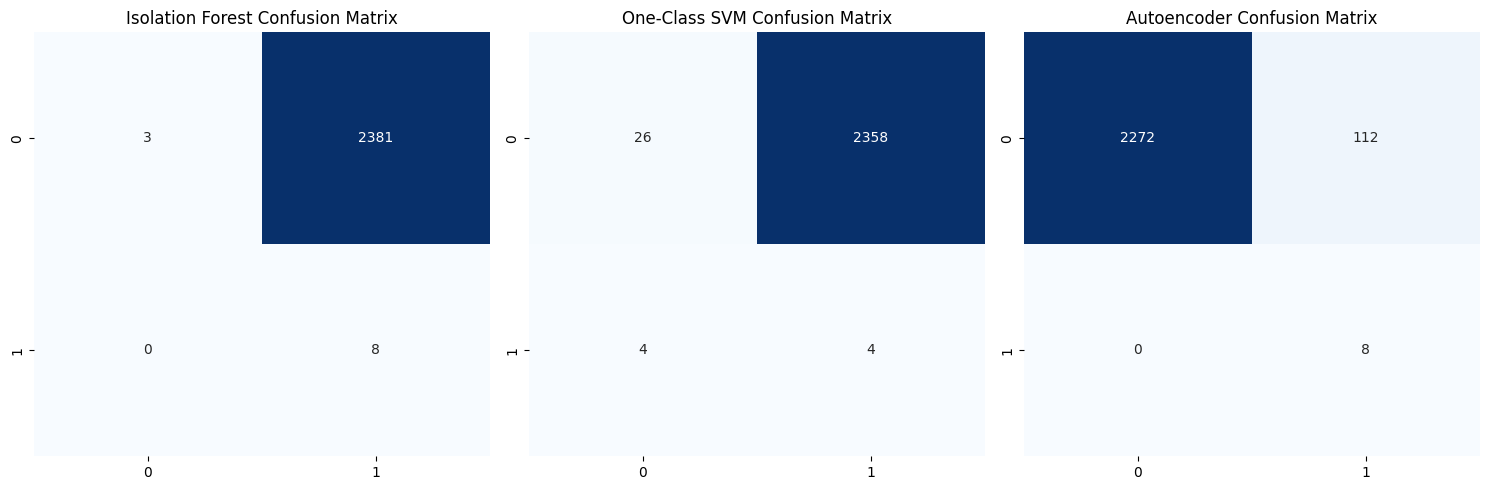

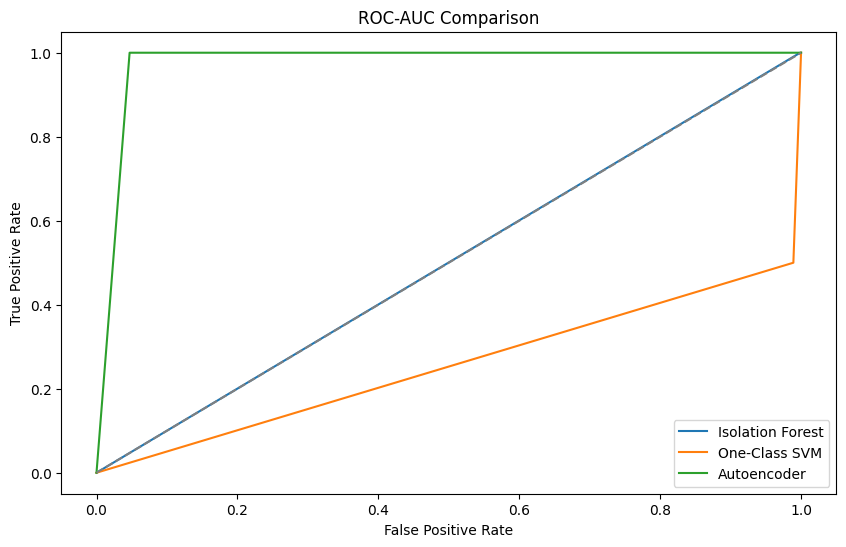

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/creditcard.csv')  # Ensure the dataset is correctly loaded.

# Check for missing values and handle them
print("Missing values before handling:")
print(df.isnull().sum())

df = df.dropna(subset=['Class'])  # Drop rows where 'Class' is NaN
df.fillna(df.median(), inplace=True)  # Fill any other NaNs with median values

print("\nMissing values after handling:")
print(df.isnull().sum())

# Handle class imbalance using SMOTE
X = df.drop(['Class'], axis=1)
y = df['Class']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model 1: Isolation Forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_train_resampled)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = [1 if x == 1 else 0 for x in y_pred_iso]

print("Isolation Forest Model Evaluation:")
print(classification_report(y_test, y_pred_iso))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_iso))

# Model 2: One-Class SVM
svm = OneClassSVM(nu=0.001, kernel="rbf", gamma='scale')
svm.fit(X_train_resampled)
y_pred_svm = svm.predict(X_test)
y_pred_svm = [1 if x == 1 else 0 for x in y_pred_svm]

print("One-Class SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_svm))

# Model 3: Autoencoder
autoencoder = Sequential([
    Dense(32, activation='relu', input_dim=X_train_resampled.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(X_train_resampled.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Get reconstruction error
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test - X_test_pred), axis=1)

# Set threshold and make predictions
threshold = np.percentile(reconstruction_error, 95)
y_pred_autoencoder = [1 if error > threshold else 0 for error in reconstruction_error]

print("Autoencoder Model Evaluation:")
print(classification_report(y_test, y_pred_autoencoder))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_autoencoder))

# Visualization of Results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Isolation Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_iso), annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title("Isolation Forest Confusion Matrix")

# One-Class SVM Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', ax=ax[1], cbar=False)
ax[1].set_title("One-Class SVM Confusion Matrix")

# Autoencoder Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_autoencoder), annot=True, fmt='d', cmap='Blues', ax=ax[2], cbar=False)
ax[2].set_title("Autoencoder Confusion Matrix")

plt.tight_layout()
plt.show()

# ROC-AUC Curves
from sklearn.metrics import roc_curve

fpr_iso, tpr_iso, _ = roc_curve(y_test, y_pred_iso)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_autoencoder, tpr_autoencoder, _ = roc_curve(y_test, y_pred_autoencoder)

plt.figure(figsize=(10, 6))
plt.plot(fpr_iso, tpr_iso, label="Isolation Forest")
plt.plot(fpr_svm, tpr_svm, label="One-Class SVM")
plt.plot(fpr_autoencoder, tpr_autoencoder, label="Autoencoder")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC-AUC Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')